In [1]:
import numpy as np
from scipy.stats import norm, fisher_exact, gaussian_kde

def get_confidence_interval(n, p_hat, alpha):
    sigma = np.sqrt(p_hat*(1-p_hat)/n)
    z_n = norm.ppf(1-alpha/2)
    return (p_hat - z_n*sigma, p_hat + z_n*sigma)

 Question 1: Comparing two models 
 ---
 
A random forest classifies correctly 88 out of 100 test examples.

Compute the 95 % confidence interval for the performance of this model.

*When rounding, give at least 3 decimals. Example of answer: `0.123, 0.456`.*
### Answer :

In [2]:
n = 100
p_hat = .88
alpha = .05
low, up = get_confidence_interval(n, p_hat, alpha)

print(f"Confidence interval :: {low:.3f}, {up:.3f}")

Confidence interval :: 0.816, 0.944


Question 2: Comparing two models (continued) 
---

An SVM with a RBF kernel classifies correctly 84 out of 100 independent test examples.

Compute the 95 % confidence interval for the performance of this model.

*When rounding, give at least 3 decimals. Example of answer: `0.123, 0.456`.*
### Answer :

In [3]:
n = 100
p_hat = .84
alpha = .05
low, up = get_confidence_interval(n, p_hat, alpha)

print(f"Confidence interval :: {low:.3f}, {up:.3f}")

Confidence interval :: 0.768, 0.912


 Question 3: Comparing two models (continued) 
 ---
 
Given your answers to the previous questions, can you conclude that the RF model is better than the SVM model?

*Beware: you will only receive credit for this question if you answered the two previous ones correctly.*

### Answer :
- [x] No
- [ ] Yes

Question 4: Comparing two models (continued) 
---

We will use a statistical test to decide whether the performances of the two models differ.

Since the sample sizes are here relatively small, we can use a Fisher exact test to compare the proportions (rem.: a $\chi^2$ test is a common alternative likely offering similar numerical results).

What is the p-value of the Fisher exact test on these proportions?

*When rounding, give at least 3 decimals.*
### Answer :

In [4]:
_, p = fisher_exact([[12, 16], [88, 84]])

print(f"p-value of the fisher exact test :: {p:.3f}")

p-value of the fisher exact test :: 0.542


Question 5: Comparing two models (continued) 
---

Can you conclude from this test that there is a statistically significant difference between our two models?

*Beware: you will only receive credit for this question if you answered the previous one correctly.*

### Answer :
- [x] No
- [ ] Yes

Question 6: Comparing two models (continued) 
---

What is the minimal number of test examples (instead of the 2 times 100 examples originally used) that would be needed in the previous test to get a p-value below 1%, assuming the test classification rates do not change (88 % versus 84 %)?

*Please report the number of examples needed for each model (not twice this number).*
### Answer :

In [5]:
alpha = .01
p_hat1 = .88
p_hat2 = .84
for n in range(1000, 10000):
    m1 = p_hat1*n; m2 = p_hat2*n
    _, p_value = fisher_exact([[m1, m2], [n-m1, n-m2]])
    if p_value < alpha: break

print(f"We need {n} samples to have a p-value less than {alpha}")

We need 1032 samples to have a p-value less than 0.01


Question 7: An evaluation protocol 
---

A well informed data analyst observes that a machine learning package is apparently bugged as it produces models that, once tested on independent test examples, have classification accuracies distributed uniformly in the interval [0%,100%].

To support his hypothesis, the data analyst implements the following protocol. He repetitively learns models with the package under study and he observes the accuracies on independent test samples.

More specifically, he reproduces this experiment (learn and test) over several independent training/test sets and he reports as quality measure the average of the test accuracies observed on k such test sets. As his results could depend on particular tests, he repeats the whole protocol over 100 distinct runs. He then plots the distribution of this quality measure over the 100 runs and he monitors how this distribution evolves as a function of the number k=2,5,10,20,50,100 of test sets considered.

From what you know about the problem at hand, how do you expect the distribution of the quality measure to behave as a function of k?

### Answer :

- The quality measure $\bar{X}$ is approximately distributed according $\sim$ Normal($\mu$,$\dfrac{\sigma^2}{k}$), with $\mu=0.5$ and $\sigma^2=\dfrac{1}{12}$.
- The quality measure is $\bar{X}=\dfrac{1}{k}\sum_{i=1}^{k}X_i$
- $X_i$, the test set accuracy computed on the i th set, is assumed to be distributed according $\sim$ Uniform($min=0$, $max=1$)

Question 8: An evaluation protocol (continued)
---

Simulate numerically the protocol of the data analyst and check whether these simulations satisfy the expected results from your theoretical analysis of the problem. Some plots should be helpful!

### Answer :
- The variance decreases when the number of test sets increases.
- The quality measure is well centered around the expected $\mu$ value, found in the previous question.

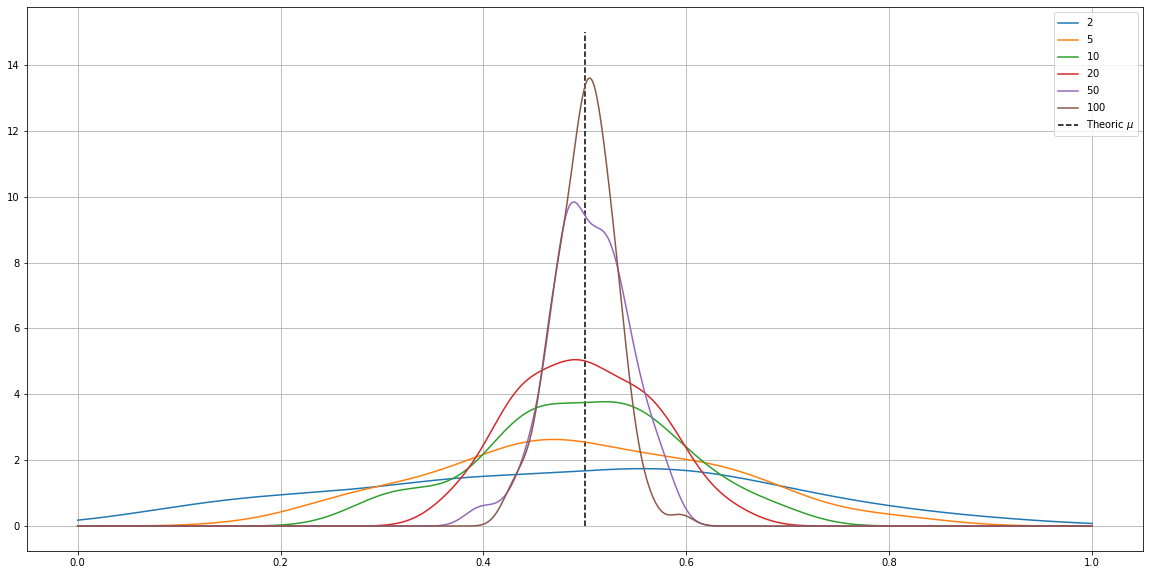

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.grid()

plt.vlines(.5, 0, 15, color="black", ls='--', label=r'Theoric $\mu$')

for k in (2, 5, 10, 20, 50, 100):
    samples = np.array([np.random.uniform(0, 1, k) for _ in range(100)])
    means = np.mean(samples, axis=-1)
    
    ranger = np.linspace(0, 1, 1000)
    plt.plot(ranger, gaussian_kde(means)(ranger), label=rf"${k}$")
plt.legend()

Question 9: An evaluation protocol (continued) 
---

What would differ in the previous analysis if the classification test accuracies would be distributed non-uniformly, while keeping the same mean and variance?
### Answer :

- The quality measure $\bar{X}$ would still be approximately normally distributed. The results are thus expected to be similar.
- The expected value of the quality measure $\bar{X}$ would stay the same.
- The variance of the quality measure $\bar{X}$ would stay the same.

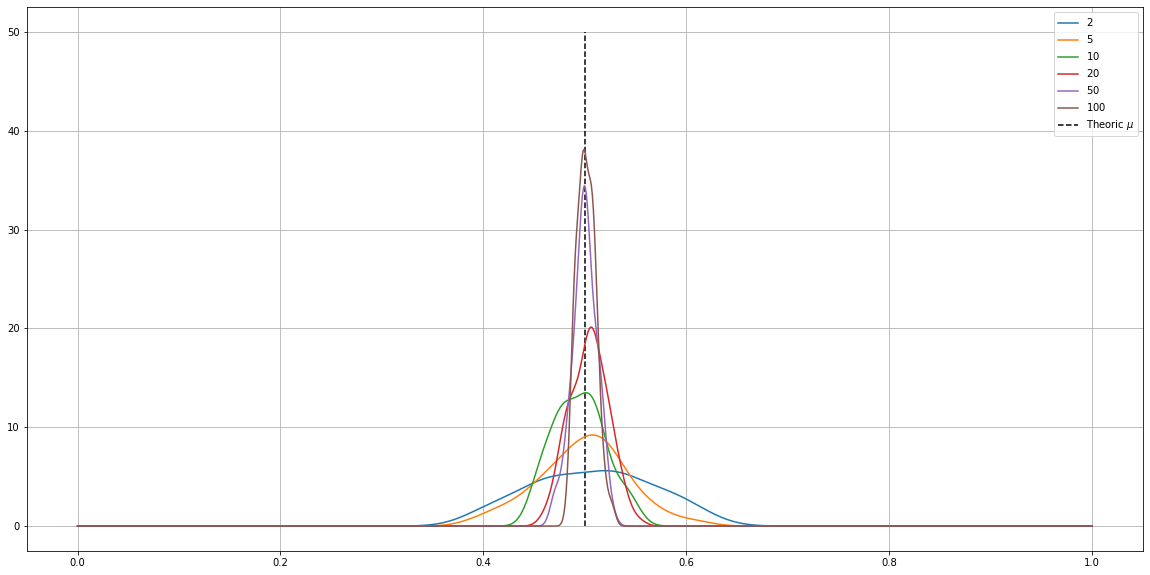

In [7]:
import matplotlib.pyplot as plt

mu = .5

plt.figure(figsize=(20,10))
plt.grid()

plt.vlines(.5, 0, 50, color="black", ls='--', label=r'Theoric $\mu$')

for k in (2, 5, 10, 20, 50, 100):
    samples = np.array([np.random.normal(.5, 1/12, k) for _ in range(100)])
    means = np.mean(samples, axis=-1)
    
    ranger = np.linspace(0, 1, 1000)
    plt.plot(ranger, gaussian_kde(means)(ranger), label=rf"${k}$")
plt.legend()

Question 10: An evaluation protocol (continued) 
---

Based on your answer to the previous question, can you conclude that such a protocol is adequate to assess how the individual test accuracies are distributed?

*Beware: you will only receive credit for this question if you answered the previous one correctly.*

### Answer :
- [x] No
- [ ] Yes